Autor: Joniel Bastos Barreto (PhD Student)

**Keras**: É uma API de rede neural de alto nível para treinamento de redes neurais. Pode ser executado em vários back-ends, como Tensorflow, Theano e CNTK.

Referência: [https://keras.io/api](https://keras.io/api)

## Introdução ao Keras

### Classe **Model**

Classe para representar grupos de camadas da sua rede
- Necessário especificar, ao menos, a entrada e a saı́da

No Keras, definimos o tipo de neurônio e o padrão de conectividade por meio da classe **Layer**.

In [1]:
from keras.layers import Input, Dense

2024-03-22 20:47:15.730200: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 20:47:15.768626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 20:47:15.768654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 20:47:15.769906: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 20:47:15.776529: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 20:47:15.776930: I tensorflow/core/platform/cpu_feature_guard.cc:1

#### Exemplos de layers

```python
    Input(
      shape=None,
      batch_size=None,
      type=None,
      parse=None,
      batch_shape=None,
      name=None,
      tensor=None
    )

    Dense(
      units,
      activation=None,
      use_bias=True,
      kernel_initializer="glorot_uniform",
      bias_initializer="zeros",
      kernel_regularizer=None,
      bias_regularizer=None,
      activity_regularizer=None,
      kernel_constraint=None,
      bias_constraint=None,
      lora_rank=None,
      **kwargs
    )
```


In [2]:
# Camada de entrada
inputs = Input(shape=(None, 4))
# Próximas camadas são conectadas utilizando notação funcional
hidden1 = Dense(10)(inputs)
hidden2 = Dense(10)(hidden1)
# Camada de saı́da
output = Dense(3)(hidden2)

#### Criar o modelo

In [3]:
from keras.models import Model

In [4]:
# Modelo completo: entrada e saı́da como argumentos
full_model = Model(inputs, output)
# Partes da rede podem ser referenciadas
# Útil para:
# - redes do tipo "encoder"-"decoder"
# - compartilhamento de pesos em redes mais complexas
only_hidden = Model(hidden1, hidden2)

#### Função de ativação

In [5]:
from keras import activations
from keras.layers import Activation

In [6]:
hidden1 = Dense(10)(inputs)
hidden1 = Activation(activations.relu)(hidden1)
# ou
hidden1 = Dense(10, activation = 'relu')
# ou
hidden1 = Dense(10, activation = activations.relu)

#### Dropout

In [7]:
from keras.layers import Dropout

    Dropout(
      rate,
      noise_shape=None,
      seed=None,
      **kwargs
    )

#### Usando uma subclasse para criar o modelo

In [8]:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.dense1 = Dense(10, activation = 'relu')
    self.dense2 = Dense(10, activation = 'relu')
    self.dense3 = Dense(3, activation = 'softmax')
    self.dropout = Dropout(0.5)

  # É possível utilizar o argumento "training (booleano)" para especificar algo apenas no treinamento
  def call(self, inputs, training=False):
    x = self.dense2(self.dense1(inputs))
    if training:
      x = self.dropout(x, training=training)
    return self.dense3(x)

model = MyModel()
model.build(input_shape=(None, 4))

In [9]:
# Resumo do modelo
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             multiple                  50        
                                                                 
 dense_7 (Dense)             multiple                  110       
                                                                 
 dense_8 (Dense)             multiple                  33        
                                                                 
 dropout (Dropout)           multiple                  0 (unused)
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Classe **Sequential**
Grupo de layers organizadas sequencialmente.
- Resultado é um objeto que herda do tipo Model
- Método **add** é chamado sequencialmente para construir o modelo

In [10]:
from keras.models import Sequential

In [11]:
model = Sequential()
# Adiciona as camadas sequencialmente
model.add(Dense(10))
model.add(Dense(10))
# Constrói o modelo indicando a entrada
model.build((None, 4))

In [12]:
# O modelo éconstruı́do continuamente se indicado o formato da entrada
model = Sequential()
model.add(Dense(10, input_shape=(None, 4)))
model.add(Dense(10))
# ou
model = Sequential()
model.add(Input(shape=(4)))
model.add(Dense(10))
model.add(Dense(10))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                50        
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 160 (640.00 Byte)
Trainable params: 160 (640.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Visualizar o modelo

In [14]:
from keras.utils import plot_model

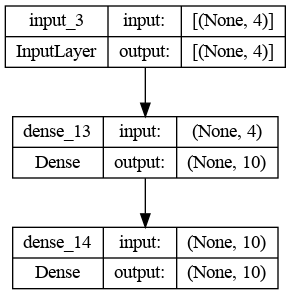

In [15]:
plot_model(model, show_shapes=True)

Existem outros tipos de camadas de rede neural que podem ser construídas com o Keras, tais como:
- Localmente Conectadas
- Convolução
- Pooling
- Recorrentes
- Padronização
- entre outros.

Mais informações: https://keras.io/api/layers/

### Inicialização dos pesos
https://keras.io/api/layers/initializers/

- Normalmente distribuı́dos
  - RandomNormal
- Uniformemente distribuı́dos
  - RandomUniform
- Valores fixos
  - Zeros
  - Ones
  - Constant

In [16]:
from keras import initializers

In [17]:
layer = Dense(
    units = 10,
    kernel_initializer = initializers.RandomNormal(stddev=0.01),
    bias_initializer = initializers.Zeros()
)

### Treinamento


    Model.fit(
        x=None,
        y=None,
        batch_size=None,
        epochs=1,
        verbose="auto",
        callbacks=None,
        validation_split=0.0,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
    )

Para utilizar amostras do dataset para validação do treinamento:
- `model.fit(validation_data=X_validacao)`, caso o conjunto de dados esteja dividido em:
  - X_treino
  - X_validacao
  - X_teste
- `model.fit(validation_split=0.3, shuffle=True)`, caso o conjunto de dados esteja dividido em:
  - X_treino
  - X_teste

O que devemos projetar quanto ao treinamento?
- Escolha da função de perda
- Escolha do método de otimização
- Escolha do critério de parada
- Cuidados quanto à generalização: técnicas regularização

#### Funções de perda
https://keras.io/api/losses/

Funções de perda probabilı́sticas
- Binary Cross-Entropy
- Categorical Cross-Entropy
- Divergência de Kullback-Leibler

Funções de perda para erro de regressão
- Erro quadrático médio
- Erro percentual médio
- Erro absoluto médio
- Erro logarı́tmico médio

In [18]:
from keras.losses import BinaryCrossentropy

In [19]:
loss = BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="sum_over_batch_size",
    name="binary_crossentropy",
)

#### Métodos de otimização
https://keras.io/api/optimizers/

- Stochastic Gradient Descent (SGD)
- RMSprop
- Adam


In [20]:
from keras.optimizers import SGD

#### Taxa de aprendizado variável

- Decaimento exponencial
- Decaimento constante
- Decaimento polinomial
- Entre outros

In [21]:
from keras.optimizers.schedules import ExponentialDecay

In [22]:
lr_schedule = ExponentialDecay(
  initial_learning_rate = 1e-2,
  decay_steps = 10000,
  decay_rate = 0.9
  )

In [23]:
optimizer = SGD(learning_rate=lr_schedule)

#### Critério de parada e métricas de desempenho
https://keras.io/api/metrics/

- Determinado número de épocas: `model.fit(epochs=100)`
- Baseado numa heurı́stica (evitando sub e sobre-ajuste)

In [24]:
# AUC (área sob a curva) das curvas ROC (VP vs FP) ou PR (Precisão vs Revocação).
from keras.metrics import AUC

In [25]:
metric = AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
)

#### Método **compile**
Configura o modelo para treinamento

In [26]:
model.compile(
  optimizer = 'Adam',
  loss = 'mean_squared_error',
  metrics = ['MeanSquaredError', 'MeanAbsoluteError']
  )

#### Early Stopping
Interromper treinamento se a métrica parar de melhorar
- Pode ser utilizado a própria função de perda no conjunto de validação, quanto
qualquer outra métrica
- É necessário especificar um valor mı́nimo considerado da mudança e paciência do
método

In [27]:
from keras.callbacks import EarlyStopping

In [28]:
callback = EarlyStopping(monitor='val_loss', patience=10)

#### Visualizar o treinamento

In [29]:
from plot_keras_history import plot_history

`plot_history(history)` utiliza o argumento **history** de `history = model.fit(...)`

### Teste

    Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)

## Exemplo de classificação com Keras usando o dataset Iris

### Carregar o dataset Iris

In [30]:
from sklearn import datasets

iris = datasets.load_iris()

In [31]:
iris.data.shape

(150, 4)

### Visualizar o conjunto de dados

In [32]:
import matplotlib.pyplot as plt

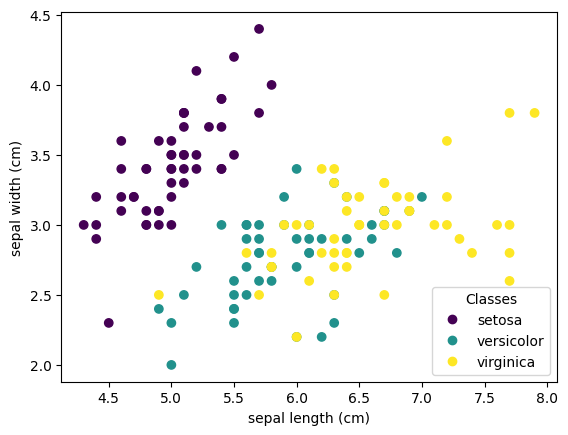

In [33]:
# O dataset Iris possui 4 atributos, então para uma visualização 2D podemos escolher 2 deles
_, ax   = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### Divisão do conjunto em treino/teste e normalização dos conjuntos

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2)

In [36]:
scale = StandardScaler()
# Aprende a média e o desvio padrão a partir do conjunto de treinamento e o normaliza
X_train_scaled = scale.fit_transform(X_train)
# Normaliza o conjunto de teste a partir da média e desvio padrão do conjunto de treinamento
X_test_scaled  = scale.transform(X_test)

In [37]:
# Keras exige que a saída tenha valores codificados one-hot
y_final = to_categorical(y_train)
y_real  = to_categorical(y_test)

In [38]:
print(X_train_scaled.shape)
print(y_final.shape)
print(X_test_scaled.shape)
print(y_real.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


### Treinamento

In [39]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 4, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.3))

    model.add(Dense(3, activation = 'softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

iris_model = create_model()

In [40]:
iris_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                50        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


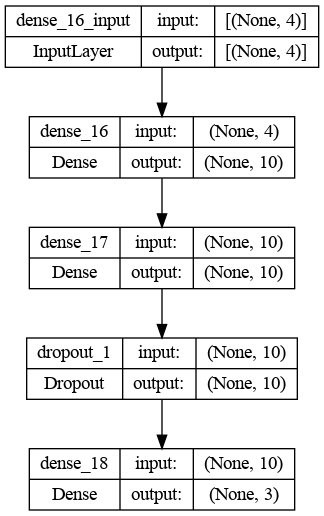

In [41]:
plot_model(iris_model, show_shapes=True)

In [42]:
callback = EarlyStopping(monitor='val_loss', patience=10)

iris_history = iris_model.fit(X_train_scaled, y_final, epochs=500, validation_split=0.2, callbacks=[callback])

Epoch 1/500
3/3 [==============================] - 1s 90ms/step - loss: 1.3656 - accuracy: 0.2917 - val_loss: 1.2386 - val_accuracy: 0.2083
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 1.2897 - accuracy: 0.3125 - val_loss: 1.2121 - val_accuracy: 0.2917
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 1.2765 - accuracy: 0.3646 - val_loss: 1.1863 - val_accuracy: 0.3750
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 1.2866 - accuracy: 0.3750 - val_loss: 1.1599 - val_accuracy: 0.5000
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 1.2245 - accuracy: 0.5000 - val_loss: 1.1342 - val_accuracy: 0.5000
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 1.2027 - accuracy: 0.4375 - val_loss: 1.1093 - val_accuracy: 0.5000
Epoch 7/500
3/3 [==============================] - 0s 13ms/step - loss: 1.1882 - accuracy: 0.4896 - val_loss: 1.0839 - val_accuracy: 0.5000
Epoch 8/500
3/3 [===

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

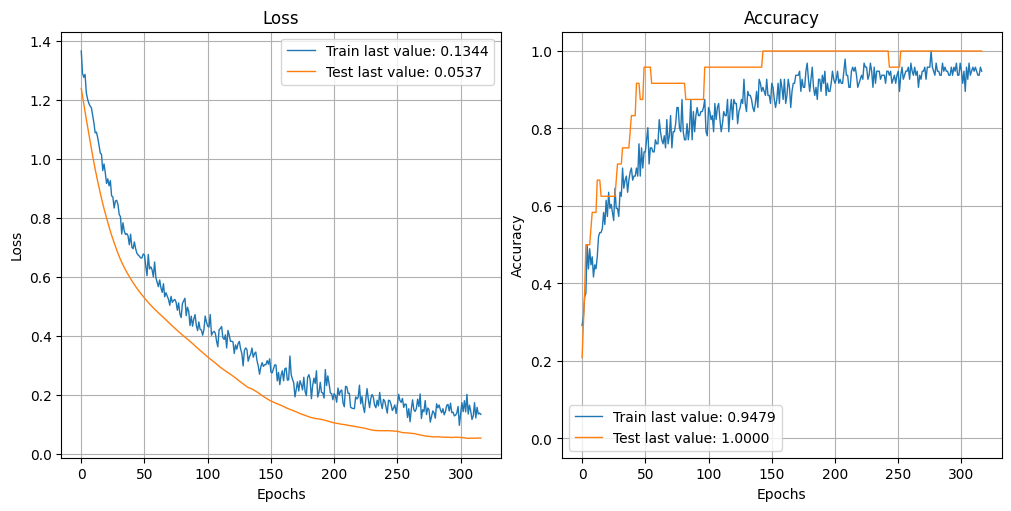

In [43]:
plot_history(iris_history)

### Teste

É possível avaliar a performance do modelo com o conjunto de teste usando o

    Model.evaluate(
      x=None,
      y=None,
      batch_size=None,
      verbose="auto",
      sample_weight=None,
      steps=None,
      callbacks=None,
      return_dict=False,
      **kwargs
    )

que retorna o valor de perda e a métrica utilizada para o conjunto de teste.


In [44]:
iris_model.evaluate(X_test_scaled, y_real)

1/1 [==============================] - 0s 23ms/step - loss: 0.0880 - accuracy: 0.9667


[0.08801940828561783, 0.9666666388511658]

Caso seja necessário fazer uma avaliação mais detalhada com outras métricas ou visualizar a matriz de confusão é possível utilizar o

    Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)
que retorna valores a saída do *softmax* e que pode ser usado para determinar a classe prevista para cada amostra.

In [45]:
y_pred = iris_model.predict(X_test_scaled)

1/1 [==============================] - 0s 71ms/step


In [46]:
y_pred

array([[9.9998599e-01, 1.0137606e-05, 3.7667264e-06],
       [9.9993998e-01, 5.0832616e-05, 9.1971870e-06],
       [6.3365599e-04, 1.3723017e-02, 9.8564321e-01],
       [9.9987006e-01, 1.1881418e-04, 1.1123501e-05],
       [9.9997061e-01, 2.3639433e-05, 5.6663748e-06],
       [1.0182914e-02, 2.0011511e-01, 7.8970206e-01],
       [9.9938029e-01, 5.8181171e-04, 3.7895279e-05],
       [6.8259781e-04, 1.1783327e-02, 9.8753411e-01],
       [6.0659135e-04, 7.6203998e-03, 9.9177283e-01],
       [9.9968123e-01, 2.8719776e-04, 3.1627824e-05],
       [9.9999064e-01, 6.8466238e-06, 2.4524209e-06],
       [9.9998397e-01, 1.2648885e-05, 3.3518638e-06],
       [9.9994522e-01, 4.5886689e-05, 8.7745657e-06],
       [9.9998838e-01, 7.3129690e-06, 4.2707379e-06],
       [4.0201601e-02, 8.5554934e-01, 1.0424909e-01],
       [9.8724067e-03, 8.2016093e-01, 1.6996656e-01],
       [6.0082364e-01, 3.9820081e-01, 9.7561575e-04],
       [5.6273541e-03, 9.7026372e-01, 2.4109012e-02],
       [4.8500070e-04, 4.015

#### Matriz de confusão

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
y = np.argmax(y_pred, axis=1)
y

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [49]:
y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

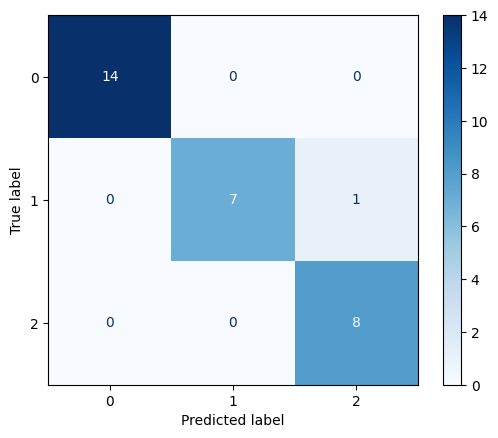

In [50]:
cm = confusion_matrix(y_test, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Métricas

In [51]:
from sklearn.metrics import classification_report
import json

cr = classification_report(y_test, y, output_dict=True)

print(json.dumps(cr, indent=4, ensure_ascii=False))
print(classification_report(y_test, y))

{
    "0": {
        "precision": 1.0,
        "recall": 1.0,
        "f1-score": 1.0,
        "support": 14.0
    },
    "1": {
        "precision": 1.0,
        "recall": 0.875,
        "f1-score": 0.9333333333333333,
        "support": 8.0
    },
    "2": {
        "precision": 0.8888888888888888,
        "recall": 1.0,
        "f1-score": 0.9411764705882353,
        "support": 8.0
    },
    "accuracy": 0.9666666666666667,
    "macro avg": {
        "precision": 0.9629629629629629,
        "recall": 0.9583333333333334,
        "f1-score": 0.9581699346405229,
        "support": 30.0
    },
    "weighted avg": {
        "precision": 0.9703703703703703,
        "recall": 0.9666666666666667,
        "f1-score": 0.9665359477124185,
        "support": 30.0
    }
}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accur

In [52]:
plot_model?

Signature:
plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)
Docstring:
Converts a Keras model to dot format and save to a file.

Example:

```python
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
```

Args:
  model: A Keras model instance
  to_file: Fi